In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("laptops.csv")
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [3]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [5]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [6]:
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [7]:
for col in strings:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

laptop
['ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6"'
 'Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6"'
 'ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6"'
 'MSI Katana GF66 12UC-082XES Intel Core i7-12700H/16GB/1TB SSD/RTX3050/15.6"'
 'HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB SSD/15.6"']
2160
status
['New' 'Refurbished']
2
brand
['Asus' 'Alurin' 'MSI' 'HP' 'Lenovo']
27
model
['ExpertBook' 'Go' 'Katana' '15S' 'Crosshair']
121
cpu
['Intel Core i5' 'Intel Celeron' 'Intel Core i3' 'Intel Core i7'
 'AMD Ryzen 5']
28
storage_type
['SSD' 'eMMC' nan]
2
gpu
[nan 'RTX 3050' 'RTX 4060' 'RTX 4050' 'RTX 3060']
44
touch
['No' 'Yes']
2


In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    

In [9]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3060,17.3,no,2699.99
2156,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3070,17.3,no,2899.99
2157,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,32,1000,ssd,rtx_3080,17.3,no,3399.99
2158,razer_book_13_intel_evo_core_i7-1165g7/16gb/1t...,refurbished,razer,book,intel_evo_core_i7,16,1000,ssd,NaN,13.4,yes,1899.99


In [10]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


In [11]:
df.tail()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2155,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3060,17.3,no,2699.99
2156,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3070,17.3,no,2899.99
2157,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,32,1000,ssd,rtx_3080,17.3,no,3399.99
2158,razer_book_13_intel_evo_core_i7-1165g7/16gb/1t...,refurbished,razer,book,intel_evo_core_i7,16,1000,ssd,NaN,13.4,yes,1899.99
2159,razer_book_fhd+_intel_evo_core_i7-1165g7/16gb/...,refurbished,razer,book,intel_evo_core_i7,16,256,ssd,NaN,13.4,yes,1699.99


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop        2160 non-null   object 
 1   status        2160 non-null   object 
 2   brand         2160 non-null   object 
 3   model         2160 non-null   object 
 4   cpu           2160 non-null   object 
 5   ram           2160 non-null   int64  
 6   storage       2160 non-null   int64  
 7   storage_type  2118 non-null   object 
 8   gpu           789 non-null    object 
 9   screen        2156 non-null   float64
 10  touch         2160 non-null   object 
 11  final_price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [13]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [14]:
base = ["ram", "storage", "screen", "final_price"]
base

['ram', 'storage', 'screen', 'final_price']

In [15]:
df = df[base]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


<Axes: xlabel='final_price', ylabel='Count'>

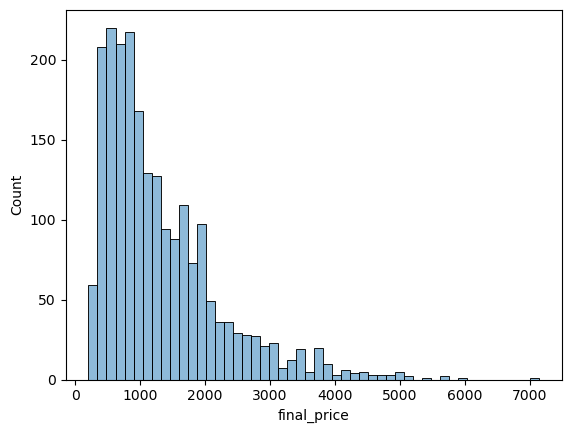

In [16]:
sns.histplot(df["final_price"], bins = 50, alpha =0.5)

In [17]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [18]:
df["ram"].median()

16.0

In [19]:
n = len(df)
n

2160

In [20]:
idx = np.arange(n)
np.random.shuffle(idx)
np.random.seed(42)

In [21]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [22]:
n_train, n_val, n_test

(1296, 432, 432)

In [23]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [24]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [25]:
df_train

,ram,storage,screen,final_price
630,16,1000,15.6,1501.55
1414,8,512,15.6,445.89
1099,32,2000,17.0,7150.47
1353,8,512,15.6,397.29
981,16,512,14.0,1058.00
...,...,...,...,...
1670,16,500,14.0,994.00
1341,8,256,15.6,1289.17
528,16,512,15.6,609.01
427,8,512,15.6,399.00


In [26]:
df_val

,ram,storage,screen,final_price
1244,16,1000,17.3,1455.40
789,16,512,16.0,1627.00
2114,64,2000,17.3,3599.00
1836,8,256,14.0,489.00
535,8,512,15.6,683.81
...,...,...,...,...
105,8,512,16.0,709.00
268,8,512,15.6,442.99
1158,16,512,15.6,1699.00
1568,16,512,15.6,1999.40


In [27]:
df_test

,ram,storage,screen,final_price
485,32,1000,16.0,2749.00
355,16,512,15.6,759.01
1409,8,512,15.6,628.96
911,16,1000,14.0,1899.00
1064,16,512,13.3,1288.19
...,...,...,...,...
1534,16,512,15.6,1061.00
1850,8,256,14.0,889.00
537,16,1000,13.4,2099.00
99,16,512,16.0,799.00


In [28]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [29]:
df_train

,ram,storage,screen,final_price
0,16,1000,15.6,1501.55
1,8,512,15.6,445.89
2,32,2000,17.0,7150.47
3,8,512,15.6,397.29
4,16,512,14.0,1058.00
...,...,...,...,...
1291,16,500,14.0,994.00
1292,8,256,15.6,1289.17
1293,16,512,15.6,609.01
1294,8,512,15.6,399.00


In [30]:
df_val

,ram,storage,screen,final_price
0,16,1000,17.3,1455.40
1,16,512,16.0,1627.00
2,64,2000,17.3,3599.00
3,8,256,14.0,489.00
4,8,512,15.6,683.81
...,...,...,...,...
427,8,512,16.0,709.00
428,8,512,15.6,442.99
429,16,512,15.6,1699.00
430,16,512,15.6,1999.40


In [31]:
df_test

,ram,storage,screen,final_price
0,32,1000,16.0,2749.00
1,16,512,15.6,759.01
2,8,512,15.6,628.96
3,16,1000,14.0,1899.00
4,16,512,13.3,1288.19
...,...,...,...,...
427,16,512,15.6,1061.00
428,8,256,14.0,889.00
429,16,1000,13.4,2099.00
430,16,512,16.0,799.00


In [32]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_val.final_price.values

In [33]:
y_train

array([1501.55,  445.89, 7150.47, ...,  609.01,  399.  , 1599.  ])

In [34]:
y_test

array([1455.4 , 1627.  , 3599.  ,  489.  ,  683.81, 2461.21, 1599.  ,
       1199.  , 1209.01,  566.58, 1721.09,  877.09,  949.  , 5368.77,
        739.01,  875.54, 1099.  , 1438.  ,  639.  ,  899.01, 1120.  ,
       1449.  ,  299.  ,  373.49,  764.67, 4105.45, 1999.  ,  452.  ,
       1599.  ,  442.99,  443.01,  499.  ,  800.  , 1199.99, 2799.  ,
       4199.91,  379.  ,  554.  , 2209.  ,  856.24, 1799.  ,  480.95,
        906.5 ,  846.56, 1699.  , 1499.95,  413.  ,  652.19,  652.92,
       2499.  , 1414.04,  475.99, 1093.69,  709.  , 1759.  ,  802.  ,
        355.  ,  799.  , 1830.  ,  869.  ,  484.5 , 1549.  ,  594.22,
        519.01,  951.74,  449.  , 1474.28,  649.  ,  812.52,  865.4 ,
       1599.  ,  410.69,  395.4 ,  849.  , 1399.  ,  729.  ,  399.99,
        445.79,  877.63,  759.01,  509.  ,  609.01, 2399.  , 1271.  ,
       1399.  , 1799.  , 2599.  ,  527.  , 2999.  , 1699.9 , 1139.01,
       1849.  ,  809.45, 2459.01, 3799.  ,  565.54,  478.45, 4949.01,
        210.14, 1349

In [35]:
y_val

array([1455.4 , 1627.  , 3599.  ,  489.  ,  683.81, 2461.21, 1599.  ,
       1199.  , 1209.01,  566.58, 1721.09,  877.09,  949.  , 5368.77,
        739.01,  875.54, 1099.  , 1438.  ,  639.  ,  899.01, 1120.  ,
       1449.  ,  299.  ,  373.49,  764.67, 4105.45, 1999.  ,  452.  ,
       1599.  ,  442.99,  443.01,  499.  ,  800.  , 1199.99, 2799.  ,
       4199.91,  379.  ,  554.  , 2209.  ,  856.24, 1799.  ,  480.95,
        906.5 ,  846.56, 1699.  , 1499.95,  413.  ,  652.19,  652.92,
       2499.  , 1414.04,  475.99, 1093.69,  709.  , 1759.  ,  802.  ,
        355.  ,  799.  , 1830.  ,  869.  ,  484.5 , 1549.  ,  594.22,
        519.01,  951.74,  449.  , 1474.28,  649.  ,  812.52,  865.4 ,
       1599.  ,  410.69,  395.4 ,  849.  , 1399.  ,  729.  ,  399.99,
        445.79,  877.63,  759.01,  509.  ,  609.01, 2399.  , 1271.  ,
       1399.  , 1799.  , 2599.  ,  527.  , 2999.  , 1699.9 , 1139.01,
       1849.  ,  809.45, 2459.01, 3799.  ,  565.54,  478.45, 4949.01,
        210.14, 1349

In [36]:
del df_train["final_price"]
del df_val["final_price"]
del df_test["final_price"]

In [37]:
df_train

,ram,storage,screen
0,16,1000,15.6
1,8,512,15.6
2,32,2000,17.0
3,8,512,15.6
4,16,512,14.0
...,...,...,...
1291,16,500,14.0
1292,8,256,15.6
1293,16,512,15.6
1294,8,512,15.6


In [38]:
df_test

,ram,storage,screen
0,32,1000,16.0
1,16,512,15.6
2,8,512,15.6
3,16,1000,14.0
4,16,512,13.3
...,...,...,...
427,16,512,15.6
428,8,256,14.0
429,16,1000,13.4
430,16,512,16.0


In [39]:
df_val

,ram,storage,screen
0,16,1000,17.3
1,16,512,16.0
2,64,2000,17.3
3,8,256,14.0
4,8,512,15.6
...,...,...,...
427,8,512,16.0
428,8,512,15.6
429,16,512,15.6
430,16,512,15.6


In [40]:
df_train

,ram,storage,screen
0,16,1000,15.6
1,8,512,15.6
2,32,2000,17.0
3,8,512,15.6
4,16,512,14.0
...,...,...,...
1291,16,500,14.0
1292,8,256,15.6
1293,16,512,15.6
1294,8,512,15.6


In [41]:
df_train1 = df_train.copy()

In [42]:
df_train1.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [43]:
df_train1.fillna(0).isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [44]:
X_train = df_train1.fillna(0).values
X_train

array([[  16. , 1000. ,   15.6],
       [   8. ,  512. ,   15.6],
       [  32. , 2000. ,   17. ],
       ...,
       [  16. ,  512. ,   15.6],
       [   8. ,  512. ,   15.6],
       [  16. , 1000. ,   16. ]])

In [45]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    xtx = X.T.dot(X)
    xtx_inv = np.linalg.inv(xtx)
    w_full = xtx_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [46]:
w0, w = train_linear_regression(X_train, y_train)
X_train = df_train1.fillna(0).values
y_pred = w0 + X_train.dot(w)
y_pred

array([1643.1986027 ,  894.73545474, 3114.47929868, ..., 1242.88849964,
        894.73545474, 1630.24632211])

In [47]:
def rmse(y, y_pred):
    error = ( y-y_pred)**2
    mse = error.mean()
    return np.sqrt(mse)
    

In [48]:
rmse(y_train, y_pred)

np.float64(570.9102299928772)

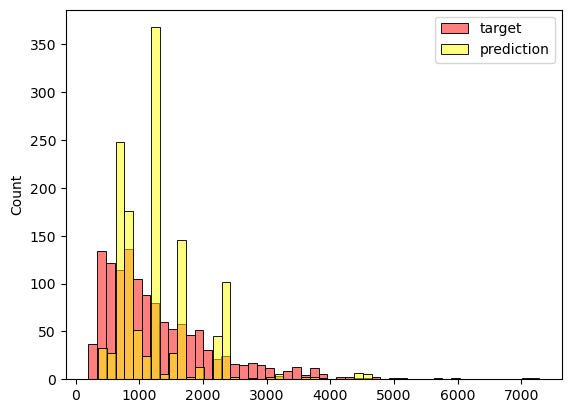

In [49]:
sns.histplot(y_train, color = "red", bins = 50, alpha = 0.5 ,label = "target")
sns.histplot(y_pred, color = "yellow", bins = 50, alpha = 0.5, label = "prediction")
plt.legend();
plt.show()
            
             

In [50]:
df_train2 = df_train.copy()

In [51]:
df_train2.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [52]:
def prepare_X_mean(df):
    df = df.copy()
    mean_value = df["screen"].mean()
    df["screen"] = df["screen"].fillna(value = mean_value)

    X = df.values
    return X

In [53]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(605.395516265442)

In [54]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [55]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=10)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(605.86108660084)

In [56]:
for r in [0, 0.01, 0.00001, 1, 5, 10, 100]:
    X_train = prepare_X_mean(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X_mean(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, score)

0 642.5873114127147 605.395516265442
0.01 641.7635636722412 605.3954654742658
1e-05 642.5864866074751 605.3955162120359
1 569.4985041151456 605.4108508983517
5 391.50375294592857 605.6159683344017
10 281.6197373661716 605.86108660084
100 47.053836712435285 606.6775171595116


In [57]:
r = 0.01
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(605.3954654742658)

In [58]:
scores = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

n = len(df)
n_val = int( n * 0.2)
n_test = int( n * 0.2)
n_train = n - n_val - n_test


for s in seeds:
    idx = np.arange(n)
    np.random.shuffle(idx)
    np.random.seed(s)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val::]]


    df_train = df_train.reset_index(drop =True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)


    y_train = df_train.final_price
    y_val = df_val.final_price
    y_test = df_test.final_price


    del df_train["final_price"]
    del df_val["final_price"]
    del df_test["final_price"]


    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    scores.append(score)

    std = np.std(scores)
    print(std)
    





0.0
15.955736242431271
29.1809996366438
25.709695431258577
22.997023415152764
23.015656399165206
22.408619501681944
28.21703051599659
30.41750001393735
28.89276126813236


In [59]:
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)
np.random.seed(9)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_train

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop = True)
df_val  = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)




In [60]:
y_train = df_train.final_price
y_val = df_val.final_price
y_test = df_test.final_price


del df_train["final_price"]
del df_val["final_price"]
del df_test["final_price"]

In [61]:
df_full_train = pd.concat([df_train, df_val])
df_full_train

,ram,storage,screen
0,32,1000,15.6
1,8,512,13.3
2,8,512,15.6
3,32,1000,17.3
4,16,1000,16.0
...,...,...,...
427,16,512,15.6
428,32,512,16.1
429,16,500,15.6
430,16,512,16.2


In [62]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([1592.89, 1349.  ,  549.  , 2999.  , 1889.  , 3129.  , 2461.21,
        388.  , 1749.  , 1029.01,  494.35, 2052.74, 1212.  ,  628.99,
        550.6 ,  749.  , 1074.06, 1092.48, 1299.  ,  581.01, 1582.84,
       2749.  ,  998.69, 2914.18, 1149.  , 1334.69,  423.58, 1576.27,
        549.93, 3399.99, 1189.01, 2228.08, 2719.  , 1599.  ,  465.  ,
        625.  , 1118.25, 2089.  , 2532.38, 1478.39,  955.  , 2459.01,
        707.69, 4842.43,  863.44, 1999.  , 1078.65, 2099.  ,  937.54,
        399.  ,  310.84,  449.  , 4199.  , 2426.53,  499.49,  755.  ,
       1659.24, 3099.  ,  479.  ,  846.67, 1199.  , 2516.82, 1751.09,
        914.64,  786.92, 1168.13, 1999.  , 3799.  , 1350.05,  499.  ,
       1175.14,  429.9 ,  499.  ,  959.93,  769.58, 1299.01, 1479.9 ,
       1163.02, 1999.  ,  830.39,  867.  ,  424.  , 2109.  , 2249.  ,
       1051.96, 2499.  , 3599.  , 1179.  , 1399.  ,  334.54,  751.88,
        881.13, 1854.36, 1199.  ,  494.81, 1899.01,  989.  ,  399.99,
       3777.49, 3699

In [63]:
df_full_train = df_full_train.reset_index(drop = True)
df_full_train

,ram,storage,screen
0,32,1000,15.6
1,8,512,13.3
2,8,512,15.6
3,32,1000,17.3
4,16,1000,16.0
...,...,...,...
859,16,512,15.6
860,32,512,16.1
861,16,500,15.6
862,16,512,16.2


In [64]:
X_full_train = df_full_train.fillna(0).values
X_full_train

array([[  32. , 1000. ,   15.6],
       [   8. ,  512. ,   13.3],
       [   8. ,  512. ,   15.6],
       ...,
       [  16. ,  500. ,   15.6],
       [  16. ,  512. ,   16.2],
       [   8. ,  256. ,   15.6]])

In [65]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.01)
X_test = df_test.fillna(0).values
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score


np.float64(587.2872125900857)